In [2]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
real = pd.read_csv('/content/gdrive/My Drive/real.csv', index_col=0)
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.942,121.504,15.4
411,2012.667,5.6,90.456,9,24.974,121.543,50.0
412,2013.250,18.8,390.970,7,24.979,121.540,40.6


In [5]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       414 non-null    float64
 1   house_age  414 non-null    float64
 2   dist_mrt   414 non-null    float64
 3   no_cvs     414 non-null    int64  
 4   lat        414 non-null    float64
 5   long       414 non-null    float64
 6   price      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [6]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True) 
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


In [7]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


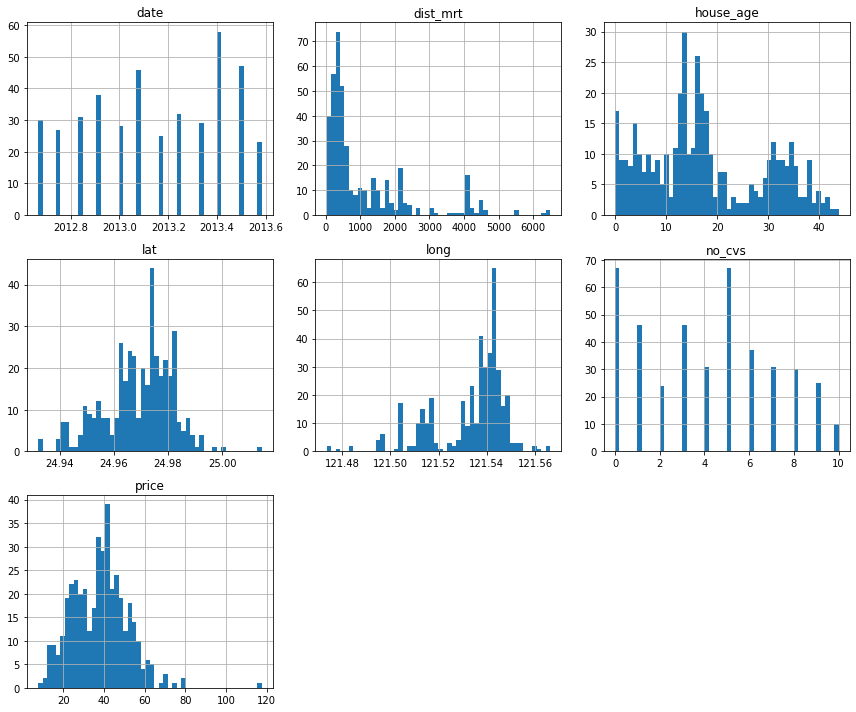

In [8]:
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

In [9]:
np.percentile(real.price, 99.5)

77.71400000000001

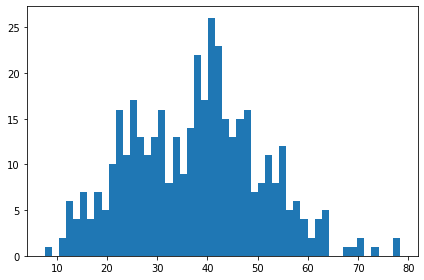

In [10]:
real = real[real.price < 80]
plt.hist(real.price, bins=50)
plt.tight_layout()

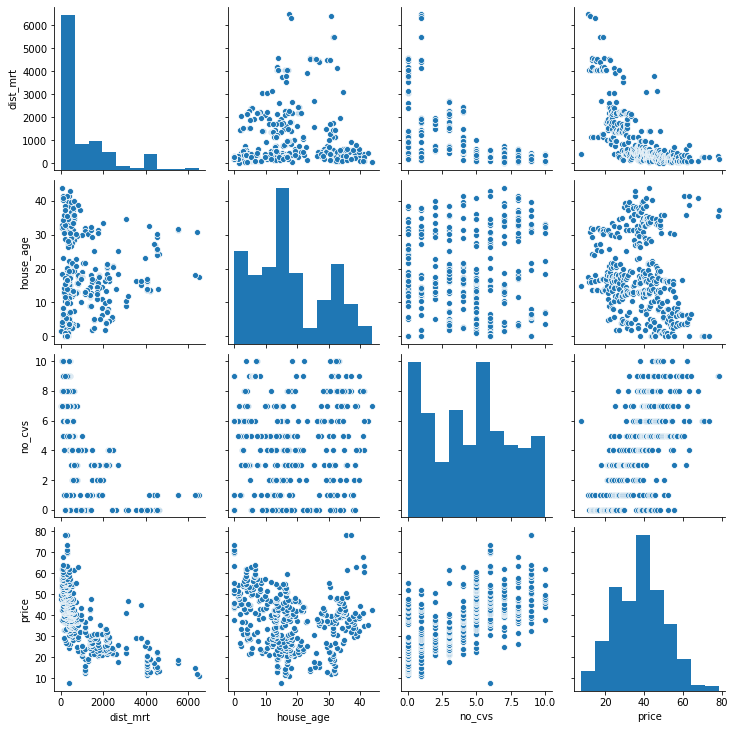

In [11]:
sns.pairplot(real[['dist_mrt', 'house_age','no_cvs','price']])

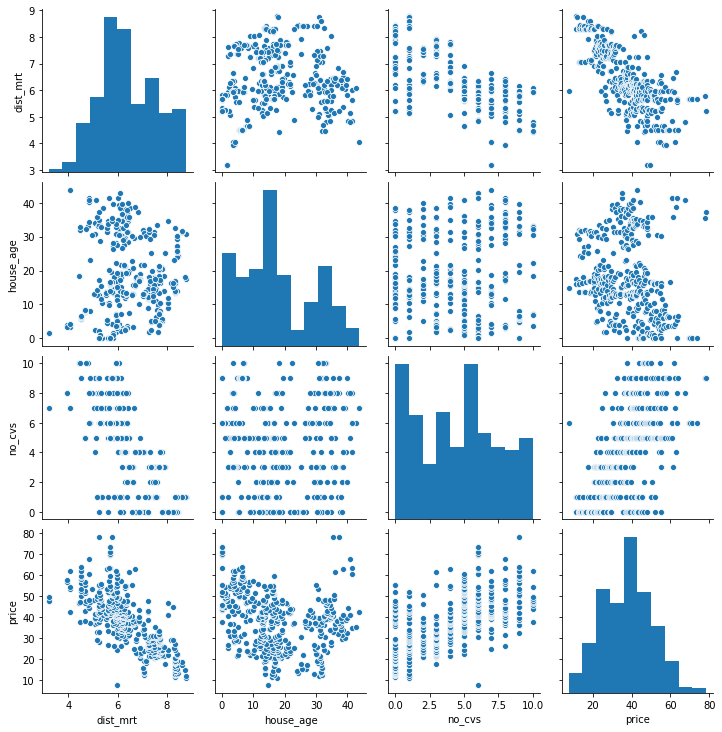

In [12]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt) # to prevent inf
sns.pairplot(real2[['dist_mrt', 'house_age','no_cvs','price']])

1. train set, test set split

In [0]:
data = real2[['dist_mrt', 'house_age','no_cvs','price']]
X = data[['dist_mrt','house_age','no_cvs']]
Y = data['price']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=415)

In [15]:
X_train

,dist_mrt,house_age,no_cvs
166,6.255,36.1,5
347,5.671,16.4,5
222,5.093,30.9,9
321,6.361,3.1,6
287,6.241,21.7,4
...,...,...,...
71,7.736,16.2,3
355,5.617,0.0,1
98,7.272,32.1,3
338,3.194,1.5,7


In [16]:
N = data.shape[0]
test = np.random.choice(np.arange(N), int(N*0.2), replace=False)
test_df = data[data.index.isin(test)].copy()
train_df = data[~data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

X_train = train_df[['dist_mrt', 'house_age','no_cvs']]
Y_train = train_df['price']
X_test = test_df[['dist_mrt', 'house_age','no_cvs']]
Y_test = test_df['price']

X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

(331, 4) (82, 4)


2. feature extraction


In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

def Scl_train(sclr, df):
    colnames = df.columns
    df = sclr.transform(df)
    df = pd.DataFrame(df)
    df.set_axis(colnames, axis=1, inplace=True)
    return df

In [18]:
X_train_sc = Scl_train(scaler, X_train)
X_train_sc.describe()

,dist_mrt,house_age,no_cvs
count,3.310e+02,3.310e+02,3.310e+02
mean,-1.734e-16,7.446e-17,2.449e-16
std,1.002e+00,1.002e+00,1.002e+00
min,-2.891e+00,-1.566e+00,-1.347e+00
25%,-6.786e-01,-7.764e-01,-1.009e+00
50%,-1.687e-01,-1.452e-01,5.104e-03
75%,8.223e-01,9.493e-01,6.809e-01
max,2.097e+00,2.300e+00,2.033e+00


In [19]:
X_test_sc = Scl_train(scaler, X_test)
X_test_sc.describe()

,dist_mrt,house_age,no_cvs
count,82.000,82.000,82.000
mean,-0.152,-0.007,0.199
std,0.980,1.032,0.959
min,-2.891,-1.566,-1.347
25%,-0.702,-0.681,-0.333
50%,-0.223,-0.132,0.343
75%,0.529,0.795,1.019
max,1.775,2.044,2.033


3. linear basis model fitting


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [0]:
def Poly_Reg(X_train, Y_train, X_test, Y_test, m, fig=False):
    # Feature Extraction
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # LR Fitting
    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, Y_train)
    Y_train_pred = lin.predict(X_train_poly)
    Y_test_pred = lin.predict(X_test_poly)

    # Compue MSE
    train_MSE = np.sqrt(np.linalg.norm(Y_train - Y_train_pred)**2/Y_train.shape[0])
    test_MSE = np.sqrt(np.linalg.norm(Y_test - Y_test_pred)**2/Y_test.shape[0])

    
    # Residual
    Resid = Y_train - Y_train_pred
    
    return {'coef':lin.coef_, 'train_MSE':train_MSE, 'test_MSE':test_MSE, 'Resid':Resid}

In [22]:
PRmodel = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, 2, fig=True)
PRmodel

{'Resid': 0     -34.640
 1      -0.312
 2      -6.655
 3      -0.938
 4     -16.035
         ...  
 326    15.693
 327    18.513
 328    15.437
 329    16.737
 330    33.284
 Name: price, Length: 331, dtype: float64,
 'coef': array([36.95 , -7.242, -3.238,  2.235, -2.894,  1.063, -2.7  ,  2.359,
         0.453, -1.013]),
 'test_MSE': 7.962571274946536,
 'train_MSE': 7.387951430793751}

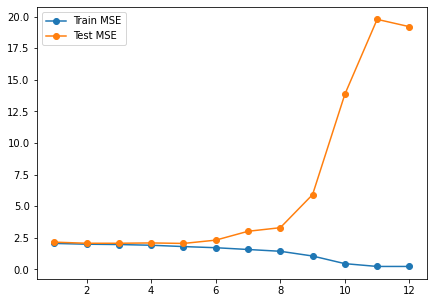

In [23]:
output = pd.DataFrame(columns=['d','Train MSE','Test MSE'])
for i in np.arange(12):
    m = i+1
    Reg = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, m, fig=False)
    output.loc[i] = [m, Reg['train_MSE'], Reg['test_MSE']]


fig, ax = plt.subplots(figsize=(7,5))
ax.plot(output['d'], np.log(output['Train MSE']), 'o-', label='Train MSE')
ax.plot(output['d'], np.log(output['Test MSE']), 'o-', label='Test MSE')

ax.legend()

4. ridge & lasso


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [0]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train_sc.reset_index(drop=True, inplace=True)
X_test_sc.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [33]:
poly = PolynomialFeatures(degree=2)
Phi_train = poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)
print(Phi_train.shape)
print(Phi_test.shape)

(289, 10)
(124, 10)


In [0]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.000e+00  1.606e+01 -8.594e-01  4.210e+00 -1.643e+00  7.461e-03
 -3.955e-01  1.622e-02 -1.841e-02 -5.887e-02]


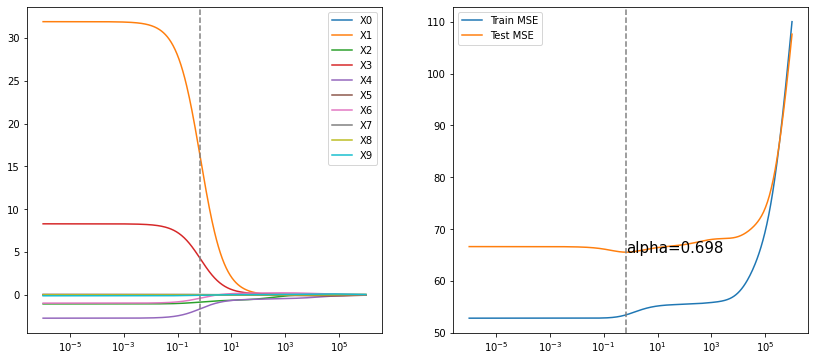

In [36]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

In [0]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

In [0]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7653.198320303748, tolerance: 4.969916297577856
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7653.1908583199875, tolerance: 4.969916297577856
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7653.182971464926, tolerance: 4.969916297577856
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7653.174635

Weight: [ 0.000e+00  1.654e+01 -8.432e-01  4.218e+00 -1.676e+00  5.371e-03
 -3.993e-01  1.618e-02 -1.896e-02 -5.596e-02]


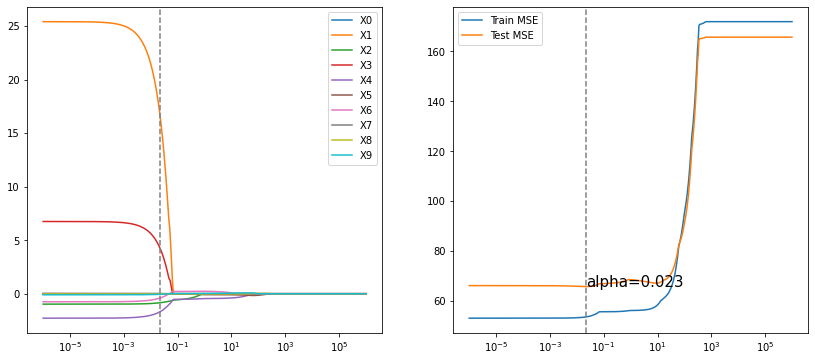

In [39]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

5. K-fold cv 

In [40]:
from sklearn.model_selection import KFold

kcv = KFold(n_splits=5, shuffle=True)

kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

i = 0
for train_index, test_index in kcv.split(Phi_train, Y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    CV_Phi_train, CV_Phi_test = Phi_train[train_index,:], Phi_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    Ridge_output = Ridge_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: [  0   1   2   4   5   7   8   9  10  11  12  13  14  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  31  32  33  34  35  37  39  42  43
  44  45  46  48  49  50  52  53  54  55  57  58  59  61  62  63  66  67
  68  69  70  72  73  74  75  77  80  81  82  83  85  86  87  88  89  90
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 107 110 112 113
 114 115 116 117 118 120 121 123 124 126 127 128 129 130 131 132 133 134
 136 137 140 141 142 143 145 146 147 148 151 152 153 154 155 156 157 158
 160 164 165 166 167 168 170 171 172 173 175 177 178 179 180 181 183 184
 185 187 189 190 191 193 194 196 197 198 199 200 203 204 205 206 209 210
 211 212 214 216 217 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 241 242 243 244 246 247 248 249 250 251 252
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 281 282 283 285 286 287 288] TEST: [  3   6  15  30  36  38  40  41  47  51  56  60 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5656.333370556903, tolerance: 4.127229558441559
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5656.325343257253, tolerance: 4.127229558441559
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5656.3168588857325, tolerance: 4.127229558441559
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5656.307891

TRAIN: [  0   3   4   5   6   7   9  11  12  13  14  15  17  18  19  20  22  24
  26  27  28  30  31  32  33  34  35  36  38  40  41  42  43  44  46  47
  48  49  51  52  53  54  56  57  59  60  61  62  63  64  65  66  68  69
  70  71  72  73  74  76  77  78  79  81  83  84  85  87  90  91  92  93
  94  95  96  97  98  99 100 101 103 105 106 107 108 109 110 111 113 114
 115 116 117 118 119 120 122 123 125 126 127 128 130 131 132 133 135 136
 138 139 141 142 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 159 160 161 162 163 164 166 169 170 172 173 174 175 176 177 178 179 180
 182 183 185 186 187 188 189 190 192 194 195 196 198 199 200 201 202 204
 205 206 207 208 209 210 211 212 213 214 215 218 221 222 223 225 226 227
 228 229 230 232 233 234 235 236 238 239 240 241 244 245 246 247 248 249
 250 253 254 257 258 259 260 261 262 263 264 266 267 268 269 270 271 272
 273 274 276 277 278 279 280 281 282 283 284 285 286 287 288] TEST: [  1   2   8  10  16  21  23  25  29  37  39  45 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6608.565850897576, tolerance: 4.0882906493506495
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6608.5619050890955, tolerance: 4.0882906493506495
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6608.557734611575, tolerance: 4.0882906493506495
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6608.553

TRAIN: [  0   1   2   3   4   6   7   8  10  14  15  16  17  19  20  21  22  23
  25  26  29  30  31  32  33  34  36  37  38  39  40  41  42  43  44  45
  46  47  48  50  51  52  55  56  57  58  59  60  62  63  64  65  66  67
  71  73  74  75  76  77  78  79  80  81  82  83  84  85  86  88  89  90
  91  95  96  97  98  99 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 119 121 122 123 124 125 127 129 130 132 133 134 135 137 138 139
 140 142 143 144 145 146 147 148 149 150 152 154 155 156 157 158 159 160
 161 162 163 164 165 167 168 169 171 174 175 176 177 178 179 180 181 182
 183 184 185 186 188 189 191 192 193 194 195 196 197 199 200 201 202 203
 204 205 206 207 208 209 210 212 213 215 216 217 218 219 220 221 222 223
 224 225 226 227 231 232 236 237 239 240 241 242 243 245 246 247 249 250
 251 252 253 255 256 257 259 260 261 262 263 264 265 266 267 268 270 271
 272 273 274 275 276 277 279 280 281 282 283 284 285 286 288] TEST: [  5   9  11  12  13  18  24  27  28  35  49  53 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6237.471858765323, tolerance: 4.0361491515151515
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6237.4667398175225, tolerance: 4.0361491515151515
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6237.461329421111, tolerance: 4.0361491515151515
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6237.455

TRAIN: [  1   2   3   4   5   6   8   9  10  11  12  13  15  16  18  21  22  23
  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40  41  42
  45  47  48  49  50  51  52  53  54  55  56  58  60  61  63  64  65  67
  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  86  87
  88  89  90  91  92  93  94  95  96  99 100 101 102 103 104 105 106 108
 109 110 111 112 113 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 149 150 151 153 158 159 161 162 163 165 166 167 168 169 170 171 172 173
 174 176 177 181 182 184 185 186 187 188 190 191 192 193 194 195 197 198
 199 200 201 202 203 204 205 206 207 208 211 213 214 215 216 217 218 219
 220 221 222 224 226 228 229 230 231 232 233 234 235 237 238 239 240 242
 243 244 245 246 247 248 250 251 252 253 254 255 256 258 259 260 262 263
 265 266 267 268 269 275 278 279 280 281 283 284 285 286 287] TEST: [  0   7  14  17  19  20  34  43  44  46  57  59 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5585.7841694183735, tolerance: 3.547520571428571
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5585.776579768217, tolerance: 3.547520571428571
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5585.768557977305, tolerance: 3.547520571428571
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5585.760079

TRAIN: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  23  24  25  27  28  29  30  34  35  36  37  38  39  40  41
  43  44  45  46  47  49  50  51  53  54  55  56  57  58  59  60  61  62
  64  65  66  67  68  69  70  71  72  75  76  77  78  79  80  82  84  85
  86  87  88  89  91  92  93  94  97  98 100 101 102 104 106 107 108 109
 111 112 114 116 117 118 119 120 121 122 124 125 126 128 129 131 132 134
 135 136 137 138 139 140 141 143 144 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 178 179 180 181 182 183 184 186 187 188 189 190 191 192 193
 195 196 197 198 201 202 203 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 223 224 225 227 228 229 230 231 233 234 235 236 237 238 239
 240 241 242 243 244 245 248 249 251 252 253 254 255 256 257 258 261 264
 265 269 270 271 272 273 274 275 276 277 278 280 282 284 287 288] TEST: [  4  22  26  31  32  33  42  48  52  63  73 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6225.783431065643, tolerance: 4.07458772413793
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6225.77782417498, tolerance: 4.07458772413793
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6225.771898039322, tolerance: 4.07458772413793
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6225.76563448033

Weight: [ 0.000e+00  2.731e+01 -1.230e+00  6.484e+00 -2.461e+00  4.091e-02
 -7.992e-01  1.894e-02 -8.417e-03 -6.486e-02]


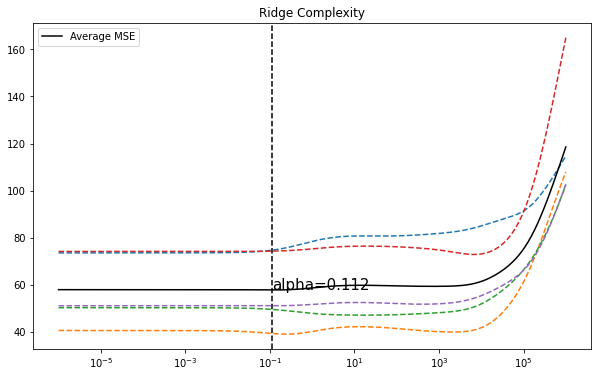

In [41]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Ridge_alphas = [alphas[np.argmin(meanMSE)]]

Weight: [ 0.000e+00  2.632e+01 -1.199e+00  6.365e+00 -2.386e+00  3.773e-02
 -7.752e-01  1.879e-02 -9.386e-03 -6.520e-02]


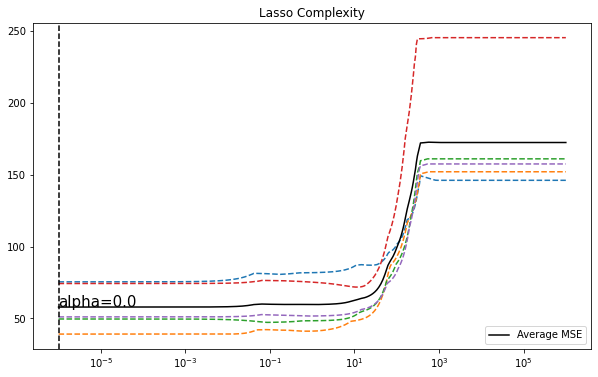

In [42]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])
Lasso_alphas = [alphas[np.argmin(meanMSE)]]

6. test mse

In [46]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, Ridge_alphas)
print(Ridge_output['test_MSE'])
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, Lasso_alphas)
print(Lasso_output['test_MSE'])

[66.1354331377107]
[66.03280889132903]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7653.198320303748, tolerance: 4.969916297577856
  positive)
